# Demo of TOAD's plotting functions

TOAD offers a few simple plotting functions to help you explore the results.


In [1]:
# Prerequisites
import numpy as np
import matplotlib.pyplot as plt
from toad import TOAD
from sklearn.cluster import HDBSCAN

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 5)

/Users/jakobharteg/miniconda3/envs/toad312/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


First, we run TOAD:



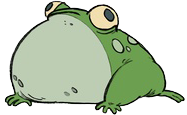

In [2]:
td = TOAD("test_data/garbe_2020_antarctica.nc", time_dim="GMST")
td.data = td.data.coarsen(x=2, y=2, GMST=2, boundary="trim").reduce(np.mean)
td

In [3]:
td.compute_clusters(
    var="thk", method=HDBSCAN(min_samples=15), shift_threshold=0.8, overwrite=True
)

INFO: New cluster variable thk_dts_cluster: Identified 17 clusters in 2,510 pts; Left 17.7% as noise (445 pts).


## `PlotConfig`

When calling `plotter()` you can pass a `PlotConfig` object with various settings to control the appearance of the plot.


In [33]:
from toad.visualisation.toad_plotter import PlotConfig

plotter = td.plot(
    PlotConfig(
        grid_labels=False,
        projection="south_pole",
        map_frame=True,
        # borders=True,
        # coastline_linewidth=0.5,
        # resolution="110m",
        # border_linewidth=0.25,
        # grid_style="--",
        # grid_width=0.5,
        # grid_color="gray",
        # grid_alpha=0.5,
        # projection="plate_carree",
    )
)

## `cluster_map()`

First off, let's plot the 10 largest cluster in the antarctica data set


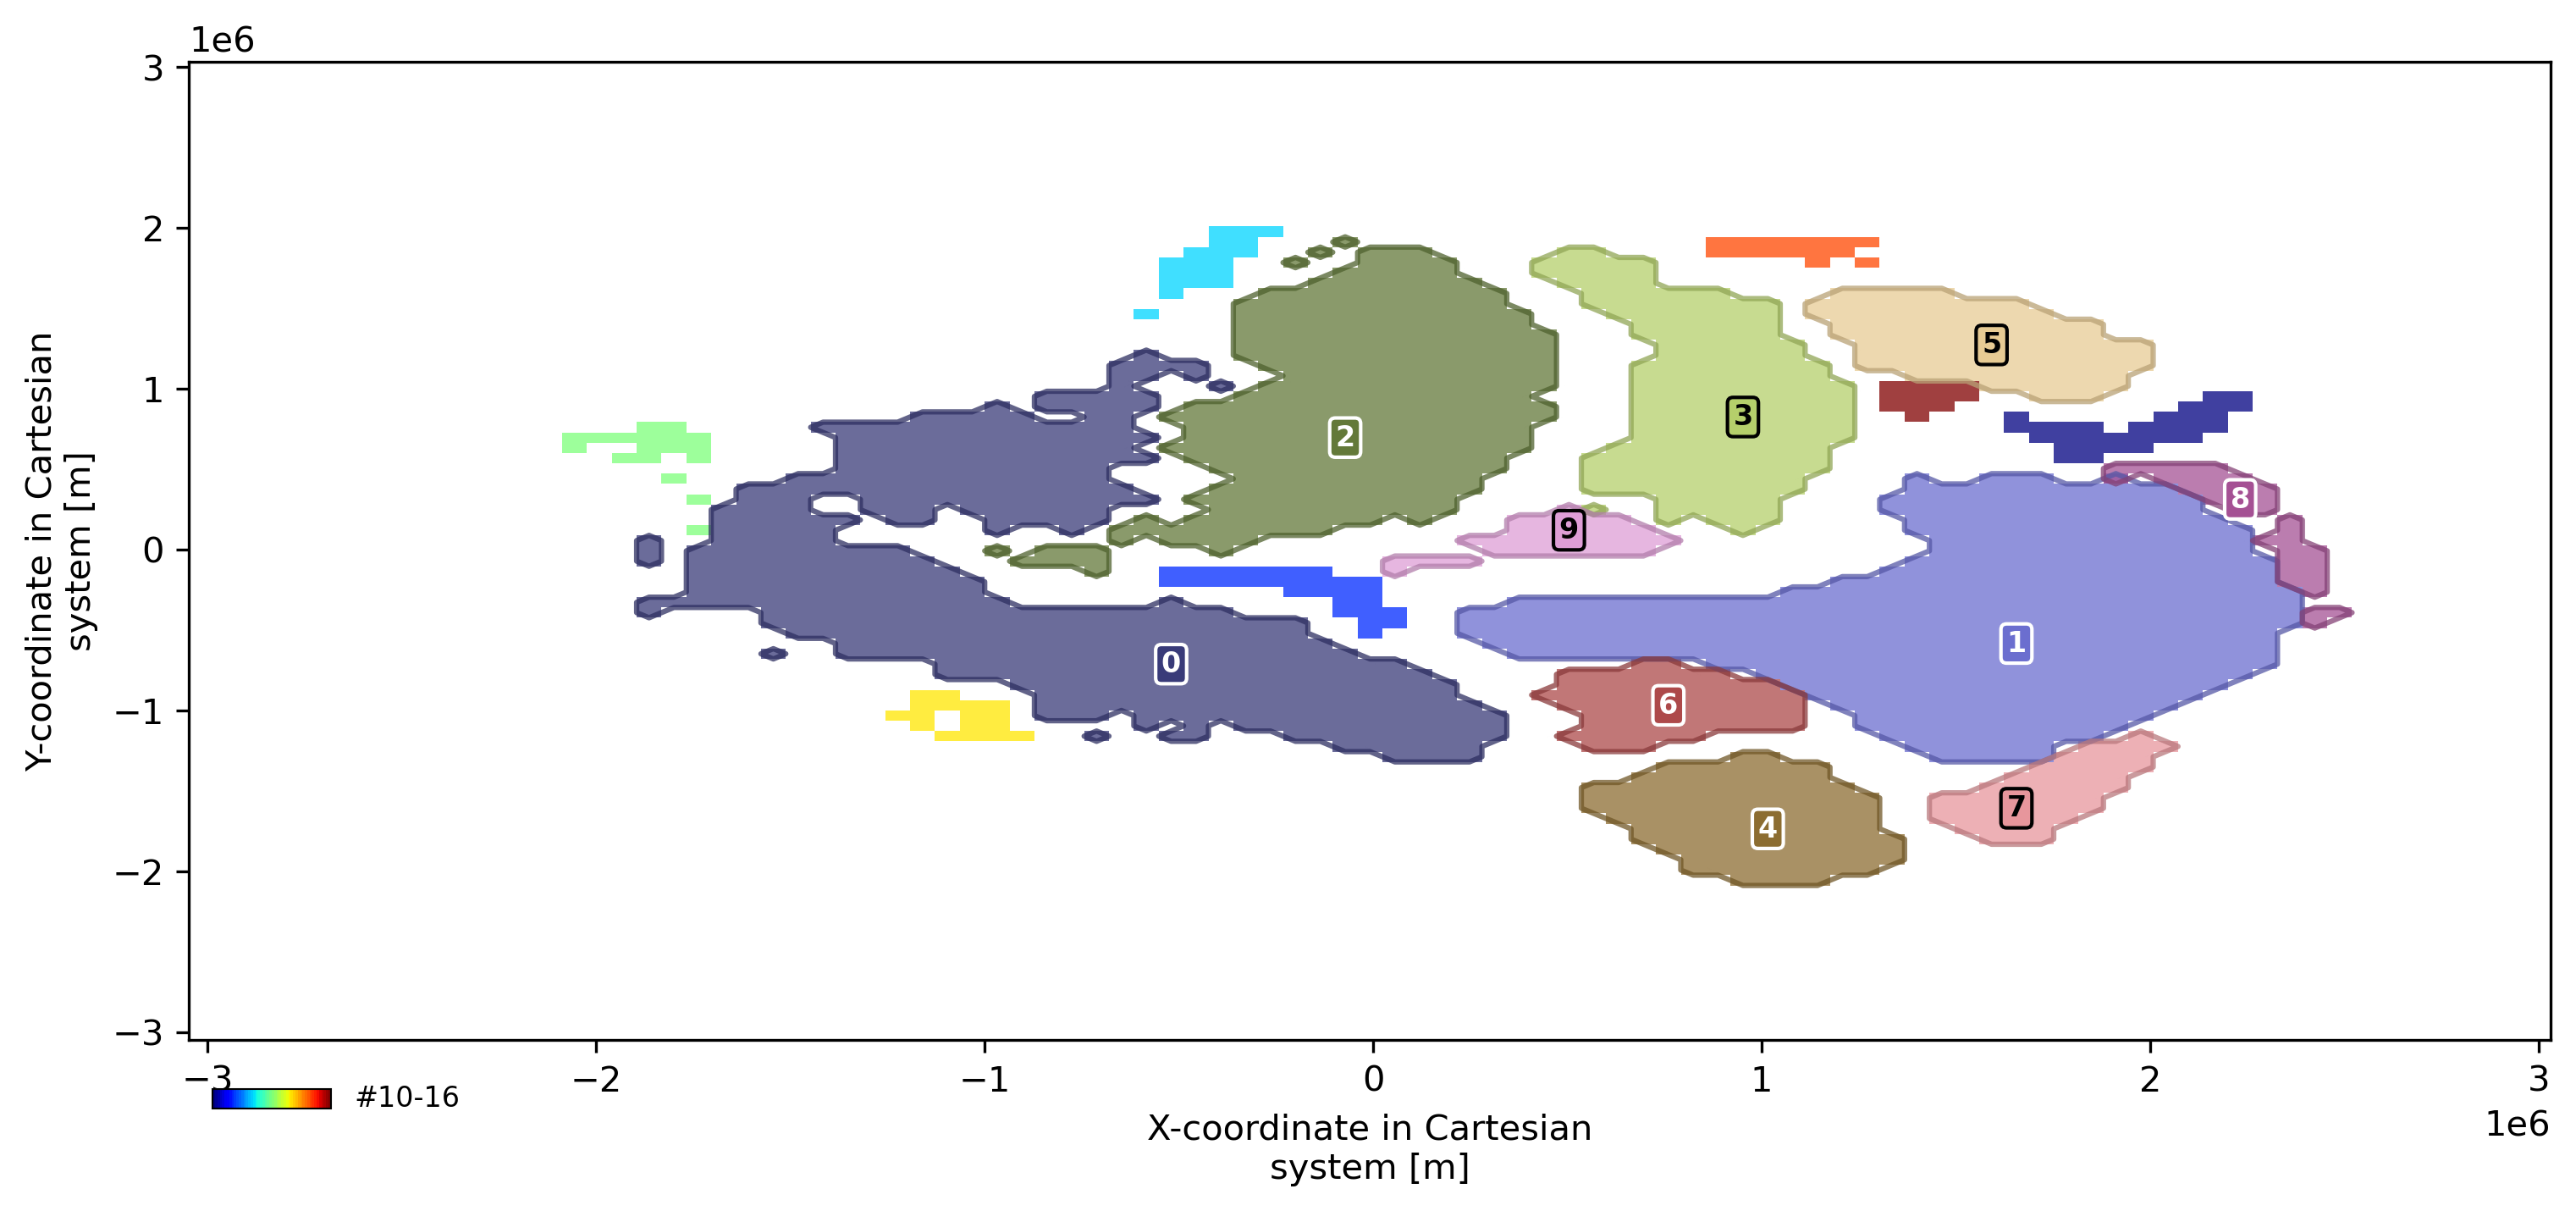

In [34]:
plotter.cluster_map("thk", cluster_ids=range(10));

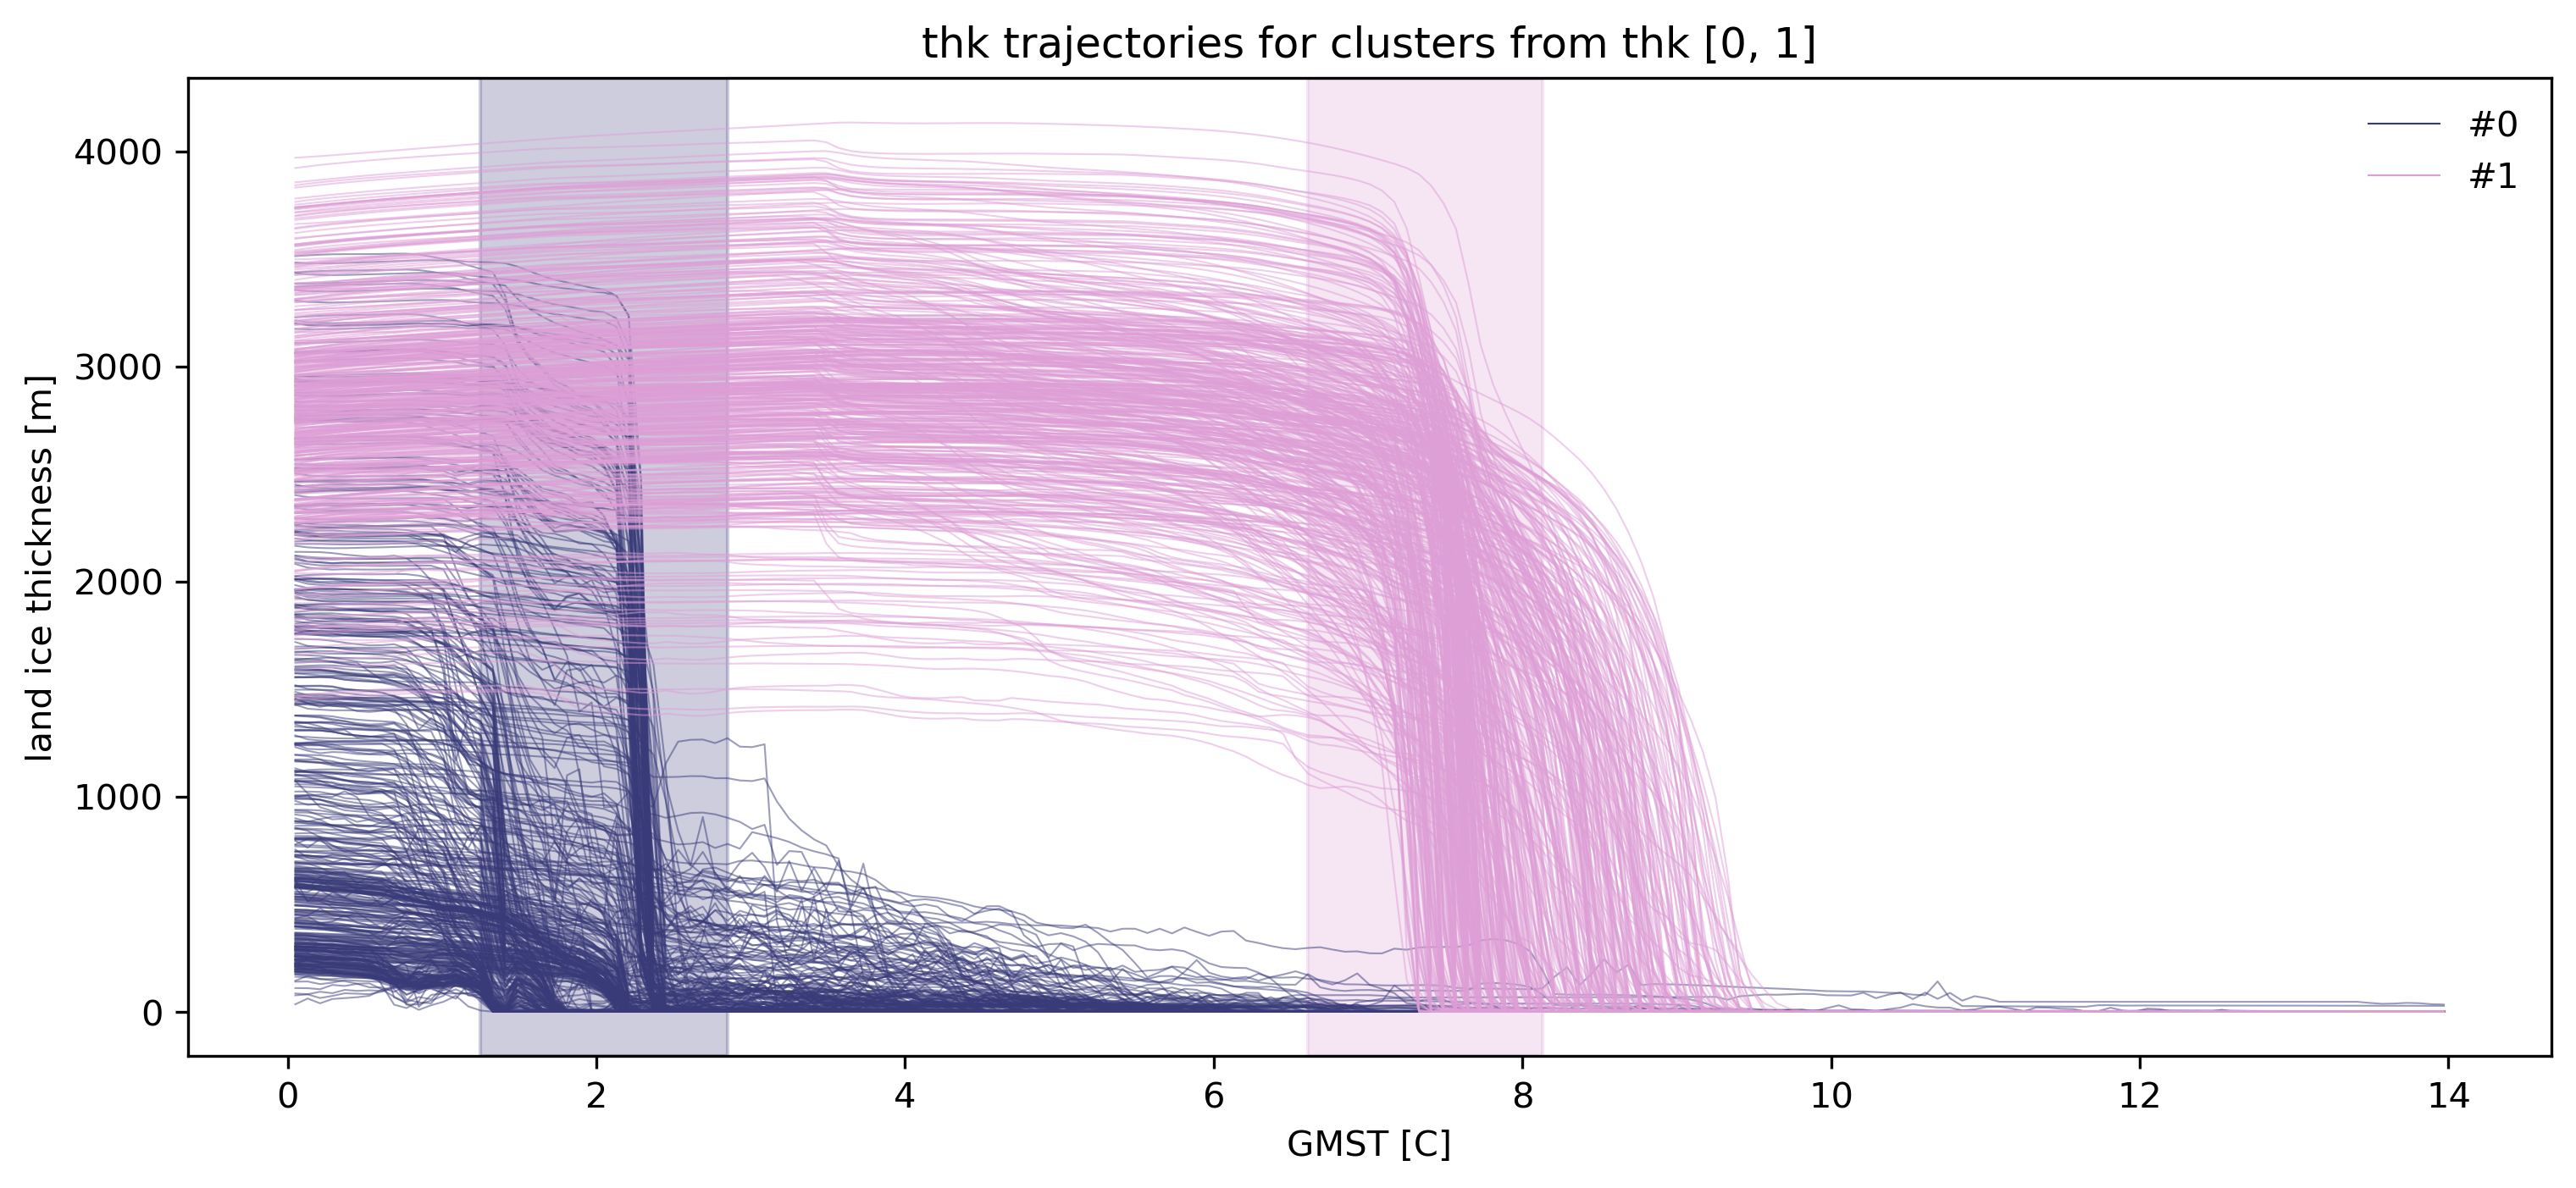

In [7]:
plotter.timeseries("thk", cluster_ids=[0, 1]);

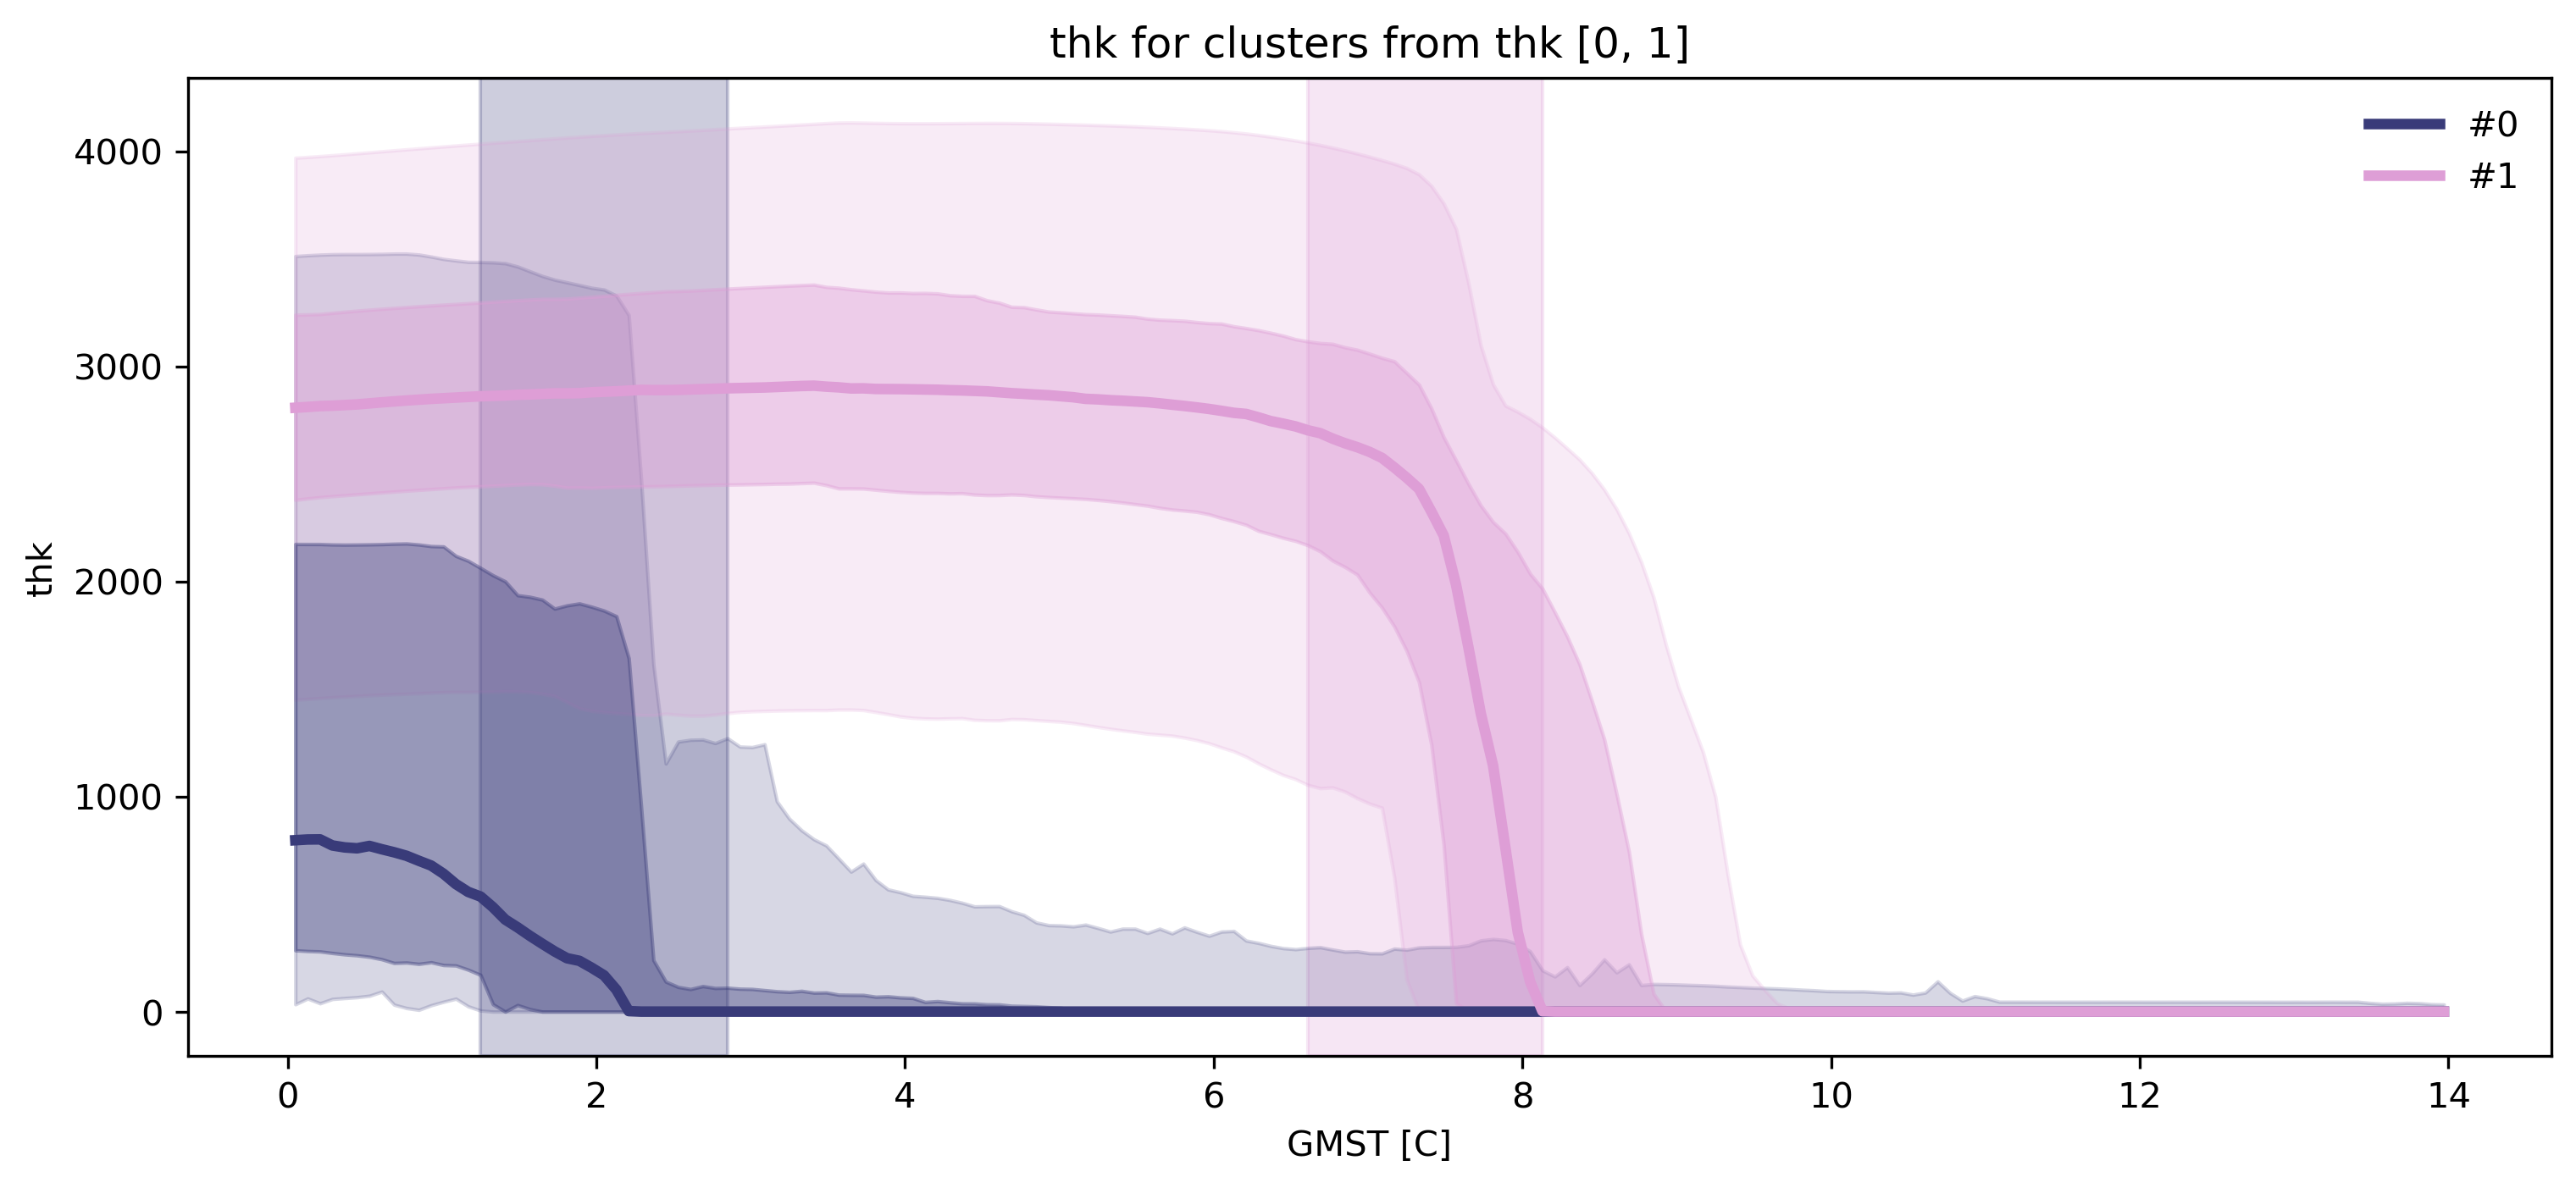

In [ ]:
plotter.timeseries(
    "thk",
    cluster_ids=[0, 1],
    plot_individual=False,
    plot_median=True,
    plot_range=True,
    plot_iqr=True,
);

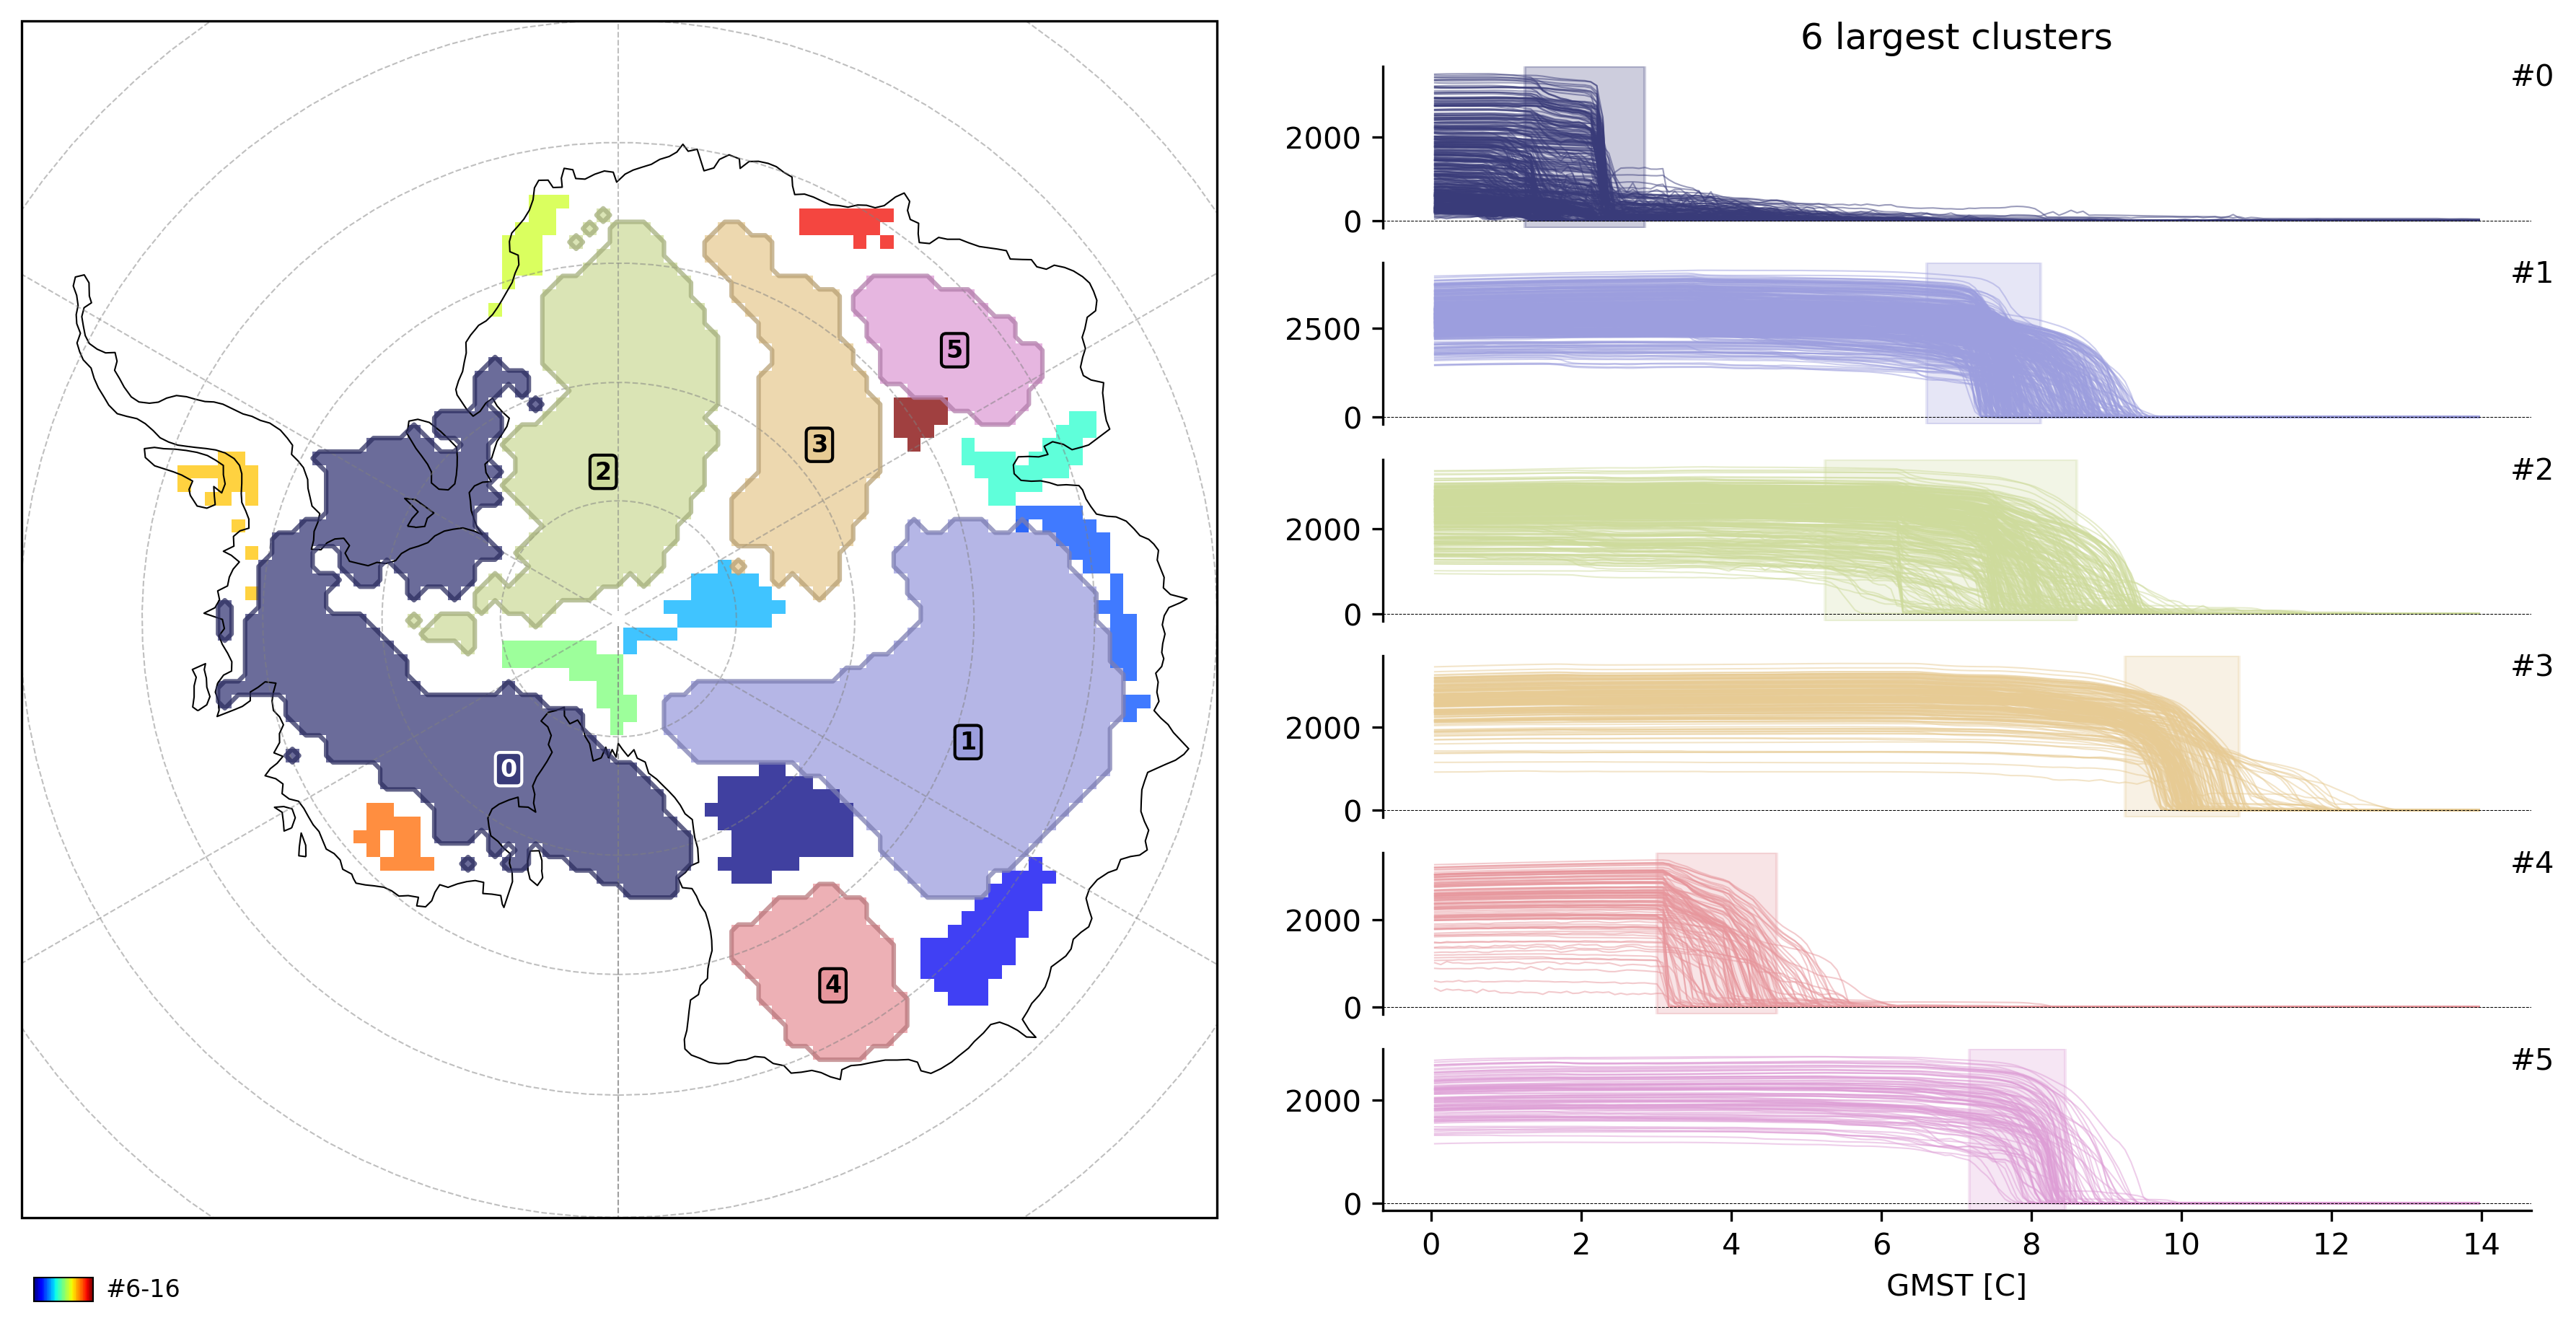

In [ ]:
plotter.timeseries_with_map(
    var="thk",
    cluster_ids=range(6),  # plot the first/largest 6 clusters
    map_projection="south_pole",
);

Or in vertical mode


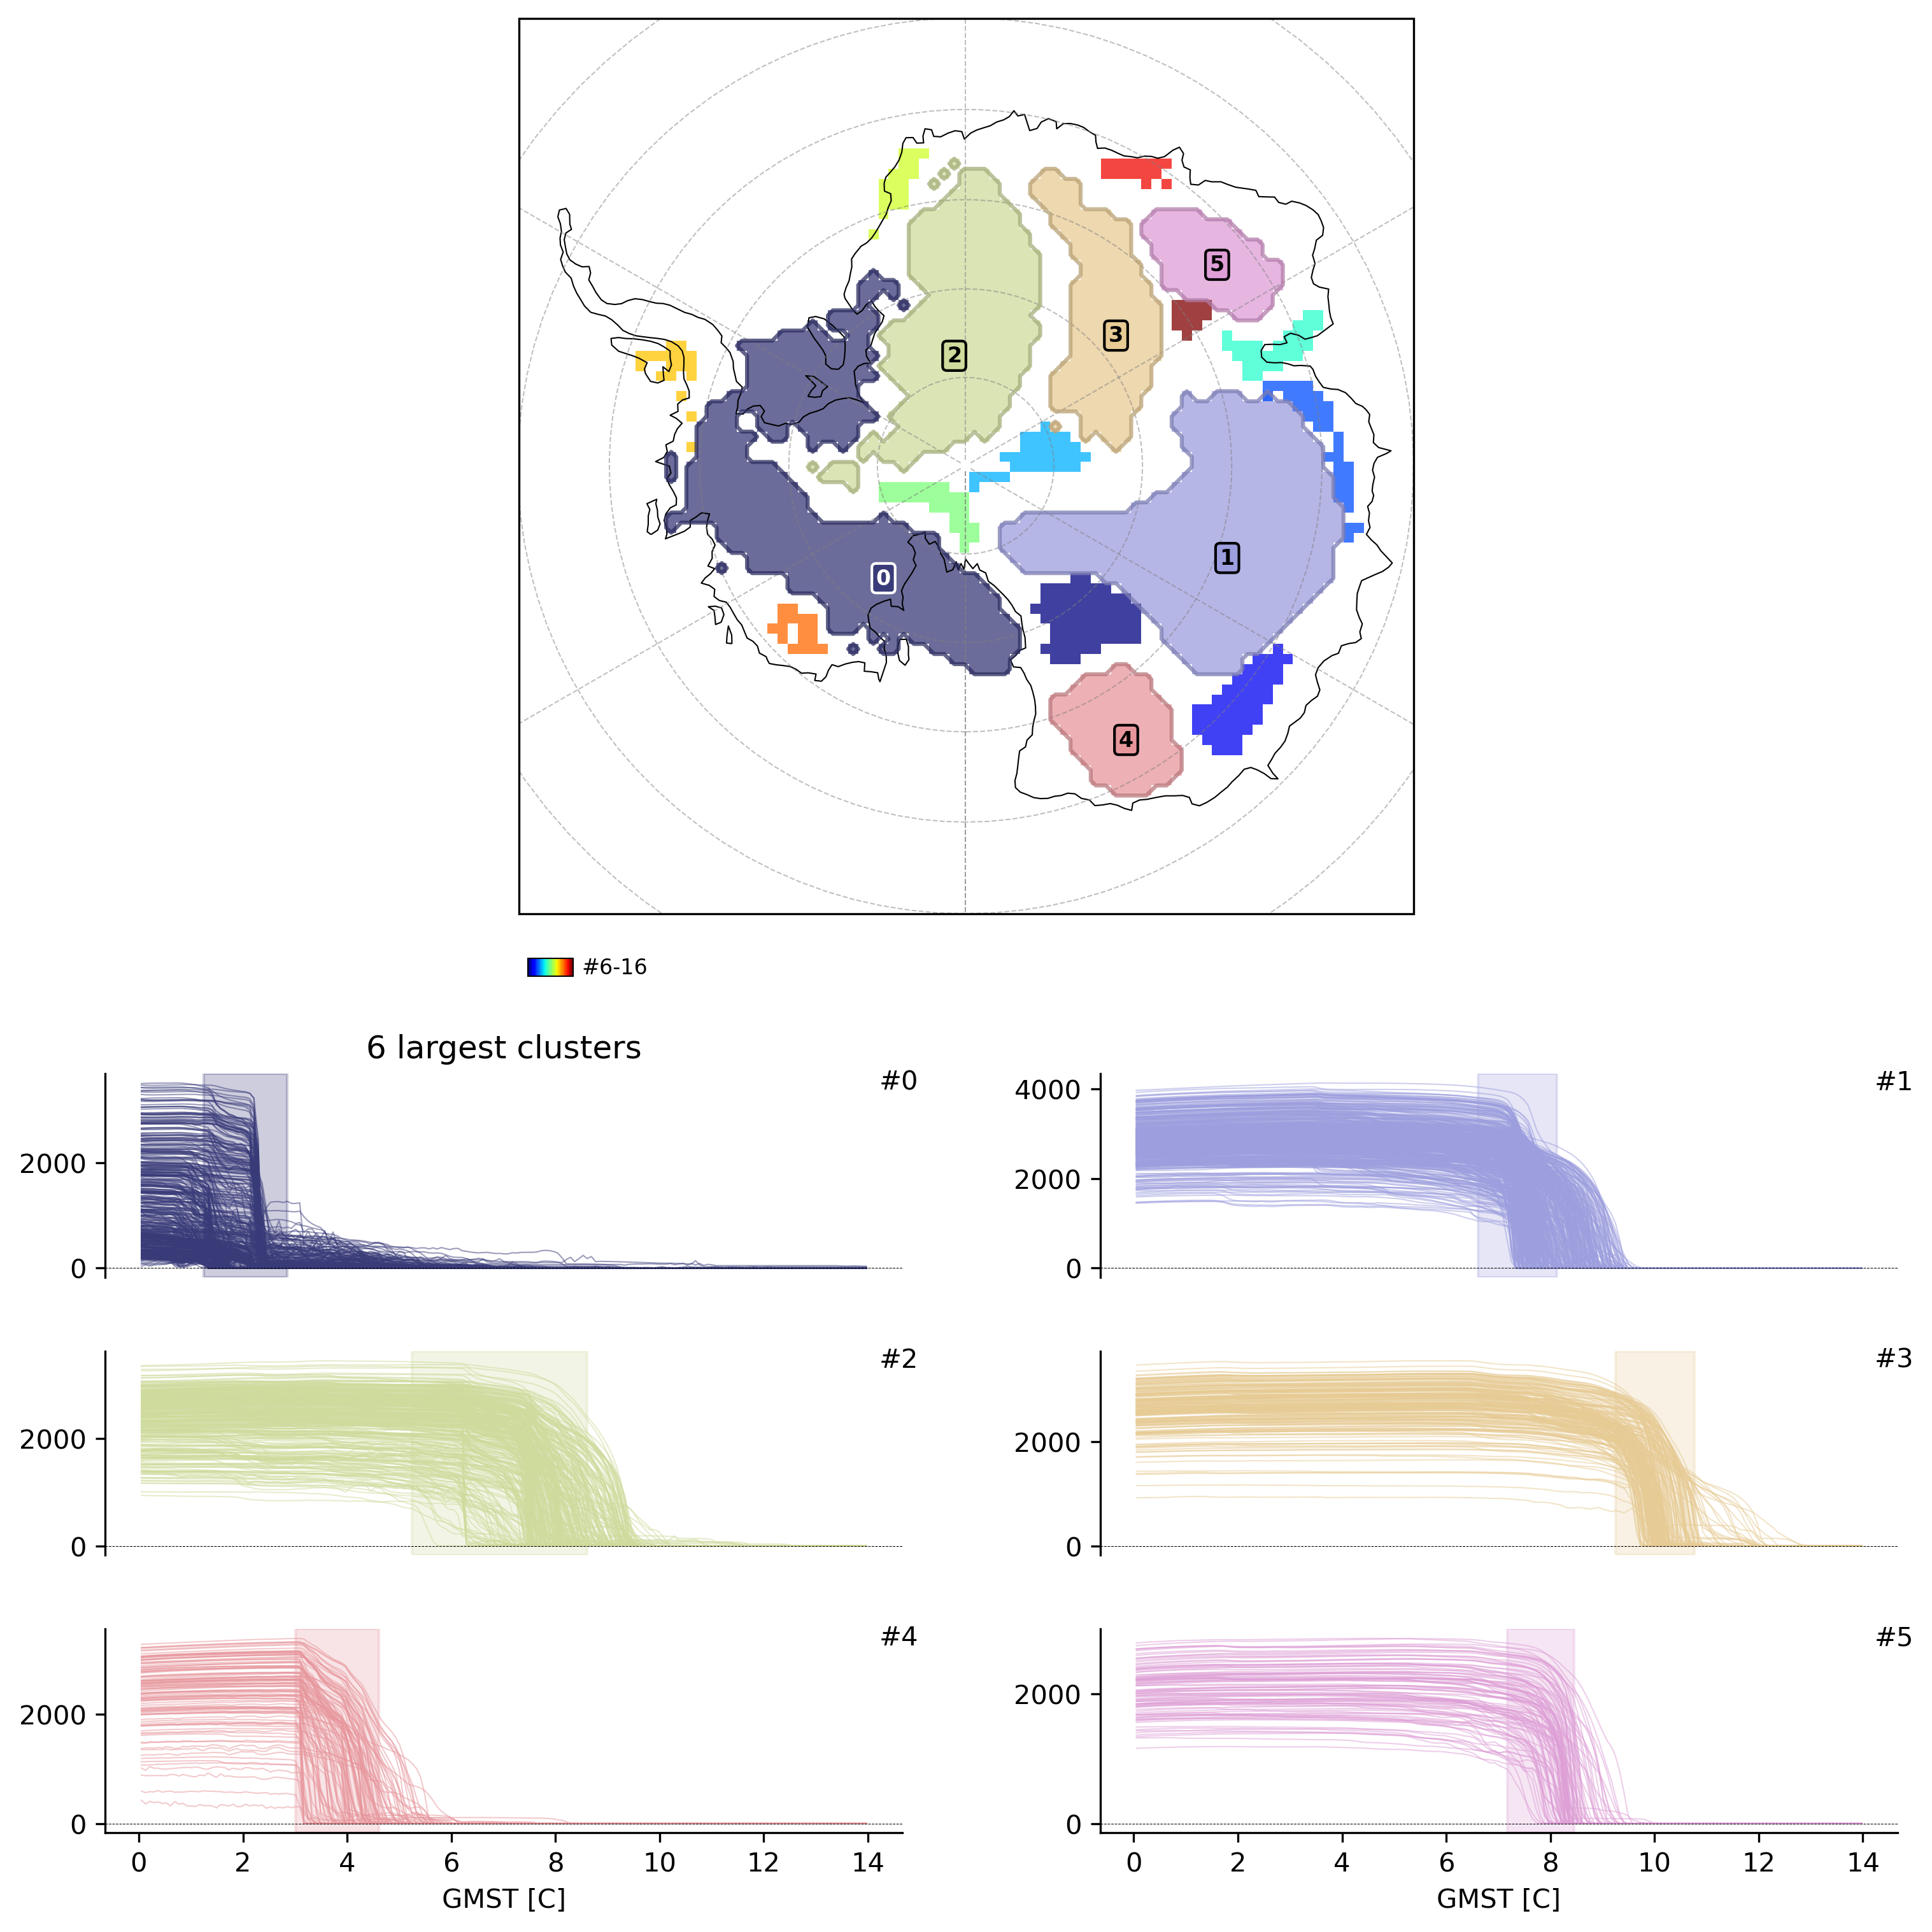

In [24]:
plotter.timeseries_with_map(
    var="thk",
    cluster_ids=range(6),  # plot the first/largest 6 clusters
    map_projection="south_pole",
    ncols=2,
    vertical=True,
    height_ratios=[1, 1],
    figsize=(10, 10),
);